In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from scipy.stats import ttest_ind, ks_2samp

In [2]:
DIRs = [p for p in glob("/home/tsy/Documents/TeamM_Defog/kpro-dehaze/data/csv/train/dataset_original/*/*") if 'all' not in p]

In [ ]:
df = pd.DataFrame()
for d in tqdm(DIRs):
    df = pd.concat([df, pd.read_csv(d)], ignore_index=True)

df.drop(columns=["id"], inplace=True)
df.drop(columns=["beta"], inplace=True)
df.drop(columns=["alpha"], inplace=True)

100%|██████████| 242/242 [01:26<00:00,  2.81it/s]


In [6]:
df

,pos_x,pos_y,pos_z,f_dc_0,f_dc_1,f_dc_2,scale_x,scale_y,scale_z,rot_0,rot_1,rot_2,rot_3,opacity,is_fog
0,-3.810663,-1.342399,-1.079739,0.254278,0.254080,0.494613,-0.397485,-3.415366,-2.325975,1.149013,-0.072978,0.373797,-0.102232,-1.212830,1.0
1,-3.188874,-1.097384,-1.843924,-0.169519,-0.147406,-0.152900,-2.253415,-0.775233,-1.328048,1.918208,0.079012,0.759098,0.116261,8.038935,1.0
2,-2.827857,-1.101933,-1.431377,0.081013,0.099302,0.229346,-1.077658,-1.608808,-0.175261,0.994718,0.341801,0.201349,-0.166287,2.596445,1.0
3,-3.315006,-0.680139,-1.816632,-0.167774,-0.158658,-0.152901,-0.045738,-0.853699,-4.505131,1.178994,-0.288840,0.277980,-0.090007,4.467404,1.0
4,-3.654078,-0.731275,-1.005535,0.003186,-0.144246,-0.029440,-1.782287,-6.825042,-1.338177,1.142525,0.205273,0.875142,-0.088542,-2.555943,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32458438,0.923128,0.052651,4.977144,1.355558,1.366083,1.342133,-0.506578,-2.802162,-0.986986,0.696531,-0.477172,-0.416925,-0.183463,3.905556,1.0
32458439,0.711170,0.628775,5.077598,1.139446,1.130432,1.194020,-1.894576,-0.821188,-3.788314,1.071364,0.097743,-0.225088,0.006169,-1.451014,1.0
32458440,3.532145,0.014614,3.294330,1.251671,1.269553,1.327126,-1.815967,-2.347392,-4.070534,0.415382,-0.264679,-0.054138,0.727288,-2.636483,1.0
32458441,3.690855,0.262296,3.289829,1.234353,1.289557,1.297240,-3.552783,-2.126753,-5.749008,0.340747,-0.115700,-0.039064,0.675102,-3.180550,1.0


  0%|          | 0/14 [00:00<?, ?it/s]

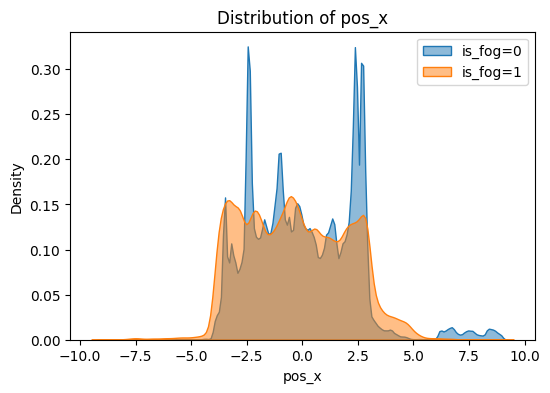

  7%|▋         | 1/14 [00:38<08:15, 38.08s/it]

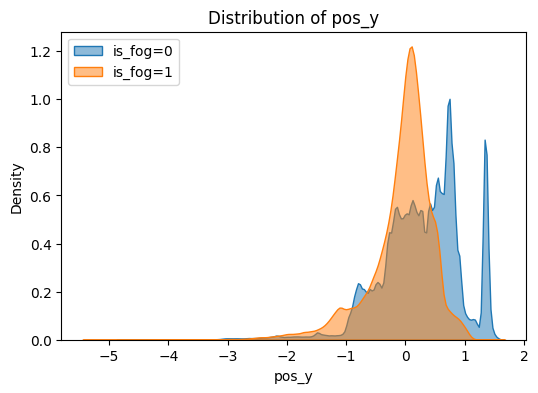

 14%|█▍        | 2/14 [01:14<07:24, 37.06s/it]

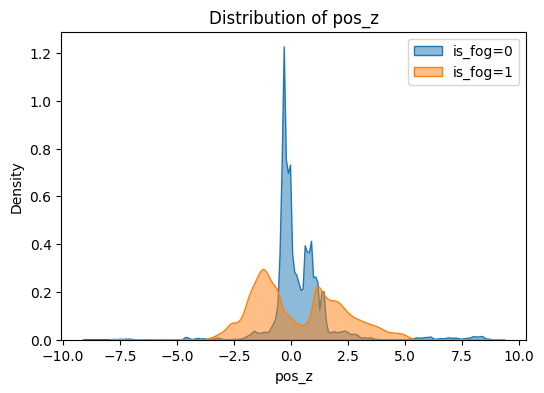

 21%|██▏       | 3/14 [01:50<06:42, 36.59s/it]

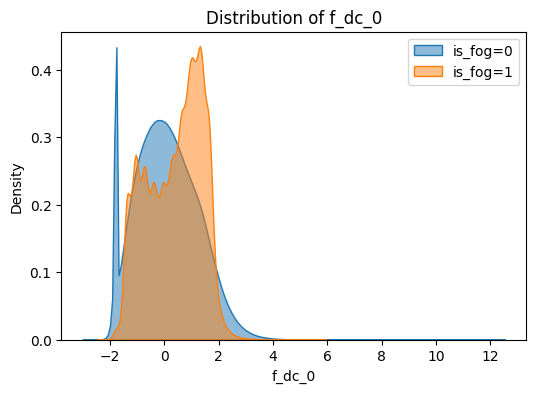

 29%|██▊       | 4/14 [02:26<06:02, 36.24s/it]

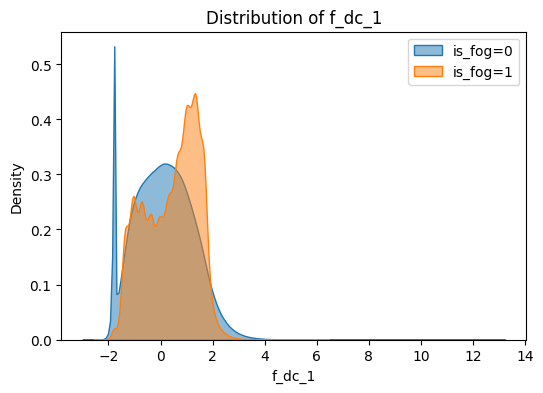

 36%|███▌      | 5/14 [03:01<05:24, 36.00s/it]

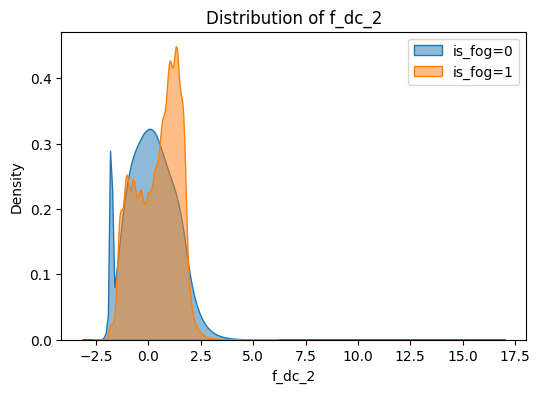

 43%|████▎     | 6/14 [03:36<04:45, 35.73s/it]

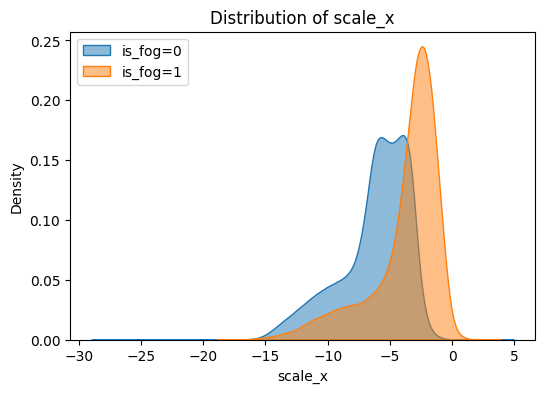

 50%|█████     | 7/14 [04:13<04:10, 35.85s/it]

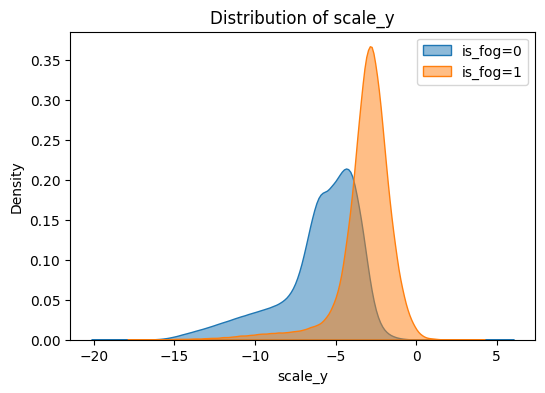

 57%|█████▋    | 8/14 [04:49<03:37, 36.17s/it]

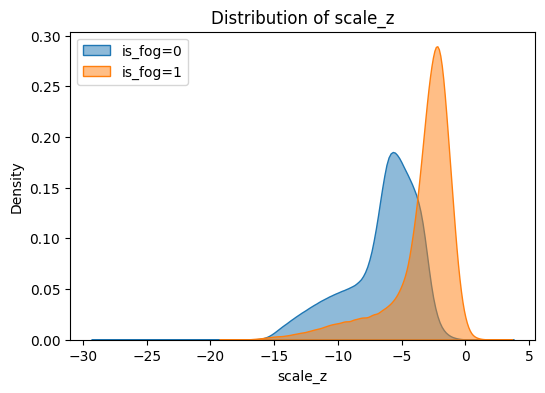

 64%|██████▍   | 9/14 [05:26<03:00, 36.17s/it]

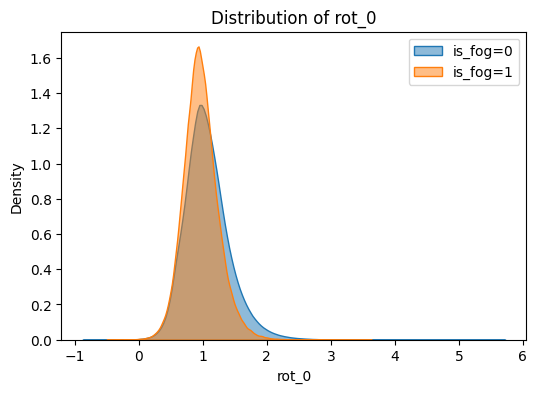

 71%|███████▏  | 10/14 [06:01<02:23, 35.94s/it]

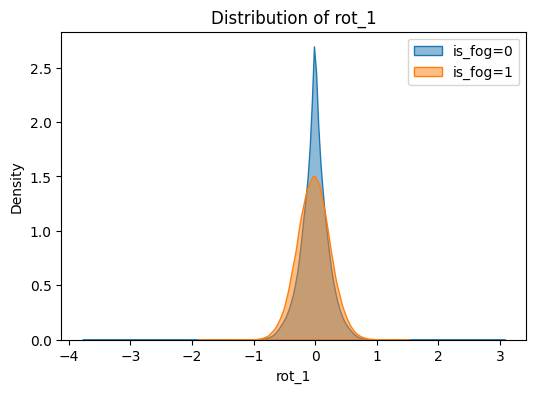

 79%|███████▊  | 11/14 [06:35<01:46, 35.37s/it]

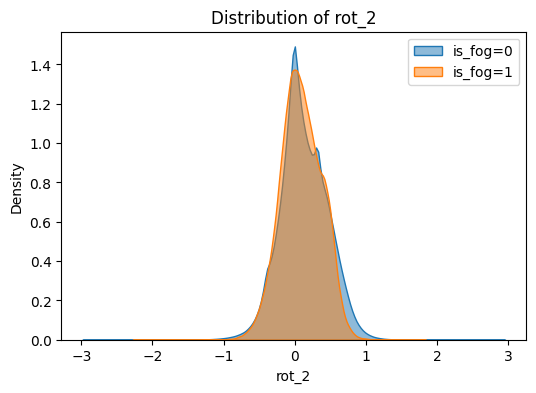

 86%|████████▌ | 12/14 [07:10<01:10, 35.19s/it]

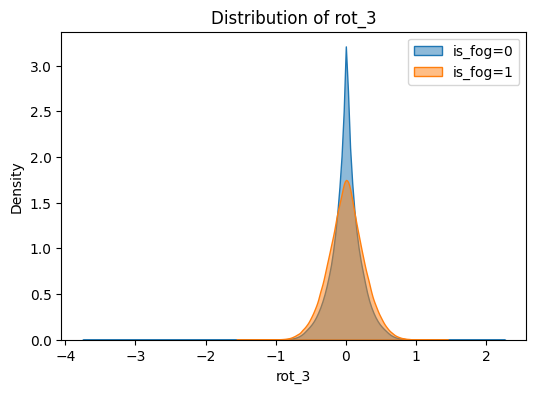

 93%|█████████▎| 13/14 [07:44<00:34, 34.79s/it]

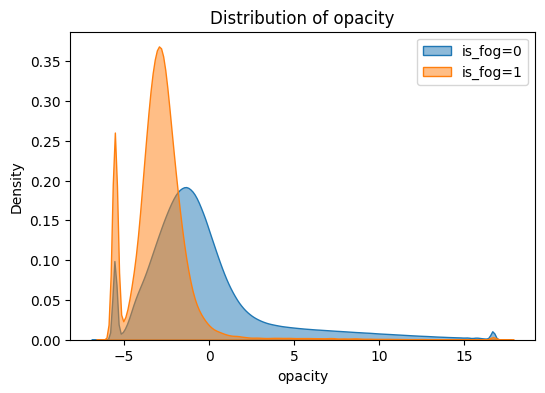

100%|██████████| 14/14 [08:22<00:00, 35.91s/it]

    feature  mean_isfog0  mean_isfog1  std_isfog0  std_isfog1  median_isfog0  \
0     pos_x     0.100327    -0.322551    2.370229    2.321176      -0.112398   
1     pos_y     0.261288    -0.071143    0.690961    0.549963       0.327061   
2     pos_z     0.360987     0.308695    1.655416    1.958633      -0.016063   
3    f_dc_0     0.069592     0.378369    1.135018    0.996860       0.006307   
4    f_dc_1     0.109664     0.407177    1.105993    1.000641       0.093543   
5    f_dc_2     0.136273     0.414696    1.125232    1.002553       0.103022   
6   scale_x    -6.277376    -3.804901    2.794883    2.825649      -5.690624   
7   scale_y    -6.022896    -3.196254    2.556453    1.804143      -5.451291   
8   scale_z    -6.574299    -3.492870    2.877225    2.699107      -5.915515   
9     rot_0     1.061876     0.964606    0.352108    0.276067       1.025864   
10    rot_1    -0.015693    -0.030799    0.225321    0.272924      -0.013067   
11    rot_2     0.124782     0.089510   

In [7]:
# Assume df is your DataFrame
features = [col for col in df.columns if col != "is_fog"]


results = []

for feat in tqdm(features):
    group0 = df[df["is_fog"] == 0][feat].dropna()
    group1 = df[df["is_fog"] == 1][feat].dropna()
    
    # Summary statistics
    mean0, mean1 = group0.mean(), group1.mean()
    std0, std1 = group0.std(), group1.std()
    median0, median1 = group0.median(), group1.median()
    
    # Hypothesis tests
    t_stat, t_pval = ttest_ind(group0, group1, equal_var=False)
    ks_stat, ks_pval = ks_2samp(group0, group1)
    
    results.append({
        "feature": feat,
        "mean_isfog0": mean0,
        "mean_isfog1": mean1,
        "std_isfog0": std0,
        "std_isfog1": std1,
        "median_isfog0": median0,
        "median_isfog1": median1,
        "t_test_pval": t_pval,
        "ks_test_pval": ks_pval
    })
    
    # Plot distributions
    plt.figure(figsize=(6,4))
    sns.kdeplot(group0, label="is_fog=0", fill=True, alpha=0.5)
    sns.kdeplot(group1, label="is_fog=1", fill=True, alpha=0.5)
    plt.title(f"Distribution of {feat}")
    plt.legend()
    plt.show()

# Convert results to DataFrame for inspection
stats_df = pd.DataFrame(results)
print(stats_df)

In [8]:
stats_df

,feature,mean_isfog0,mean_isfog1,std_isfog0,std_isfog1,median_isfog0,median_isfog1,t_test_pval,ks_test_pval
0,pos_x,0.100327,-0.322551,2.370229,2.321176,-0.112398,-0.438847,0.000000e+00,0.0
1,pos_y,0.261288,-0.071143,0.690961,0.549963,0.327061,0.036235,0.000000e+00,0.0
2,pos_z,0.360987,0.308695,1.655416,1.958633,-0.016063,-0.110084,8.122857e-68,0.0
3,f_dc_0,0.069592,0.378369,1.135018,0.996860,0.006307,0.551984,0.000000e+00,0.0
4,f_dc_1,0.109664,0.407177,1.105993,1.000641,0.093543,0.595101,0.000000e+00,0.0
5,f_dc_2,0.136273,0.414696,1.125232,1.002553,0.103022,0.602245,0.000000e+00,0.0
6,scale_x,-6.277376,-3.804901,2.794883,2.825649,-5.690624,-2.982612,0.000000e+00,0.0
7,scale_y,-6.022896,-3.196254,2.556453,1.804143,-5.451291,-2.930756,0.000000e+00,0.0
8,scale_z,-6.574299,-3.492870,2.877225,2.699107,-5.915515,-2.717180,0.000000e+00,0.0
9,rot_0,1.061876,0.964606,0.352108,0.276067,1.025864,0.947624,0.000000e+00,0.0


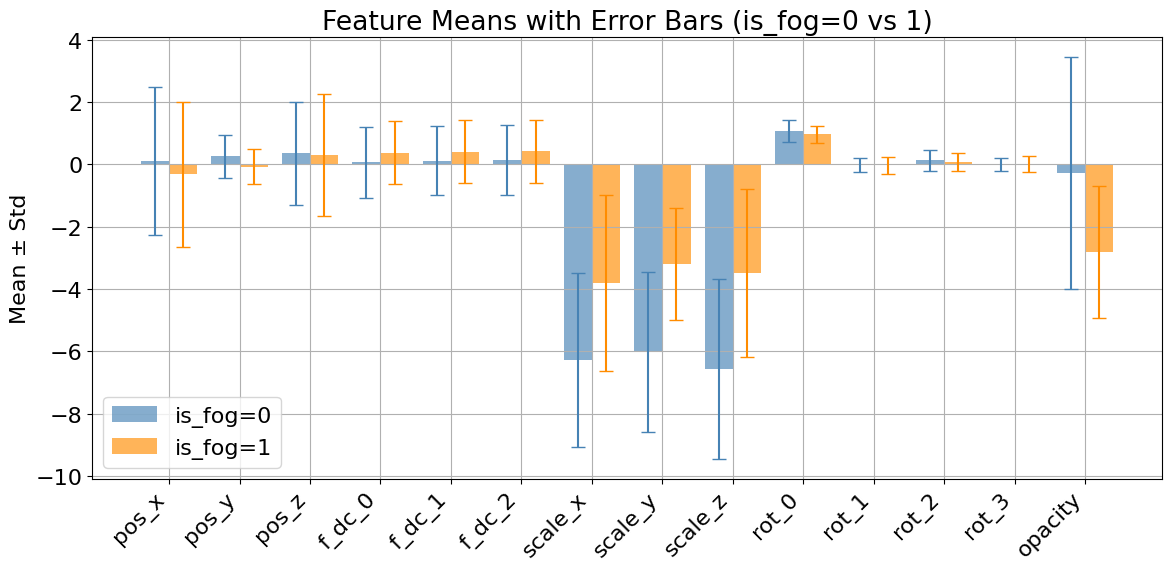

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose your table is stored in stats_df
features = stats_df["feature"].values
x = np.arange(len(features))  # x positions for features
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Define colors
color0 = "steelblue"
color1 = "darkorange"

# Plot is_fog=0
ax.bar(x - width/2, 
       stats_df["mean_isfog0"], 
       width, 
       yerr=stats_df["std_isfog0"], 
       capsize=5, 
       label="is_fog=0", 
       alpha=0.65,
       color=color0,
       ecolor=color0)  # <-- match errorbar color

# Plot is_fog=1
ax.bar(x + width/2, 
       stats_df["mean_isfog1"], 
       width, 
       yerr=stats_df["std_isfog1"], 
       capsize=5, 
       label="is_fog=1", 
       alpha=0.65,
       color=color1,
       ecolor=color1)  # <-- match errorbar color

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_ylabel("Mean ± Std")
ax.set_title("Feature Means with Error Bars (is_fog=0 vs 1)")
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
